### NEWS CRIME CLASSIFICATION

The aim of this project is to classifiy if a new article is crime related or not, the dataset is gotten from kaggle. The project is an NLP task and would be tackled by using traditional NLP techniques such as the TFID, Preprocessing and using the Naives-Bayes, logistic regression and random forest Classification to train the model.

#### DATA UNDERSTANDING

In [2]:
#import required libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [3]:
#read the dataset
df = pd.read_csv('CrimeVsNoCrimeArticles.csv')
df.head()

,title,is_crime_report
0,What's New and Cool in the Fitness Sphere?,0
1,"'Today I Die,' Says Gang Leader Who Killed Sel...",1
2,Zero Jail Time For Cop Who Assaulted Disabled ...,1
3,Three Easy Gratitude Lessons,0
4,Can Change At UVA Make Campuses A Safer Place?,0


In [4]:
#Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            7123 non-null   object
 1   is_crime_report  7124 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 111.4+ KB


In [5]:
#check for null value
df.isnull().sum()

title              1
is_crime_report    0
dtype: int64

In [6]:
#replace null values with a null string
df_cl = df.where((pd.notnull(df)), '')
df_cl.head()

,title,is_crime_report
0,What's New and Cool in the Fitness Sphere?,0
1,"'Today I Die,' Says Gang Leader Who Killed Sel...",1
2,Zero Jail Time For Cop Who Assaulted Disabled ...,1
3,Three Easy Gratitude Lessons,0
4,Can Change At UVA Make Campuses A Safer Place?,0


In [7]:
#check for null value again
df_cl.isnull().sum()

title              0
is_crime_report    0
dtype: int64

#### DATA EXPLORATION

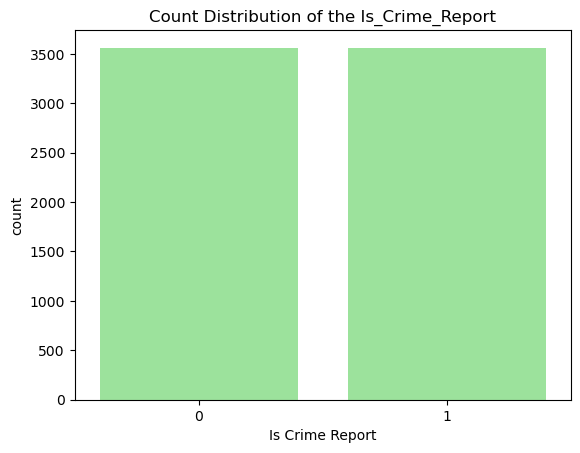

In [8]:
#Visualize is_crime_report distribution
sns.countplot(data=df_cl, x='is_crime_report', color='lightgreen')
plt.xlabel('Is Crime Report')
plt.title('Count Distribution of the Is_Crime_Report')
plt.show()

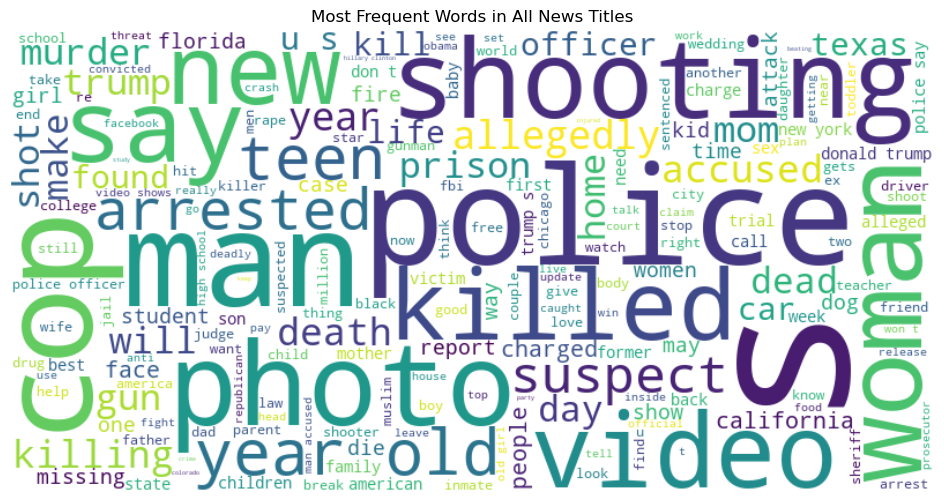

In [9]:
#visualize the Most Frequent words in all News titles using Wordcloud

#clean the title properly before using wordcloud
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    return text

#create wordcloud 
def generate_wordcloud_all(df):
    text = ' '.join(clean_text(t) for t in df['title'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords= STOPWORDS).generate(text)
    
    #visualize 
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Frequent Words in All News Titles')
    plt.show()

# Call the generate_wordcloud function
generate_wordcloud_all(df_cl)


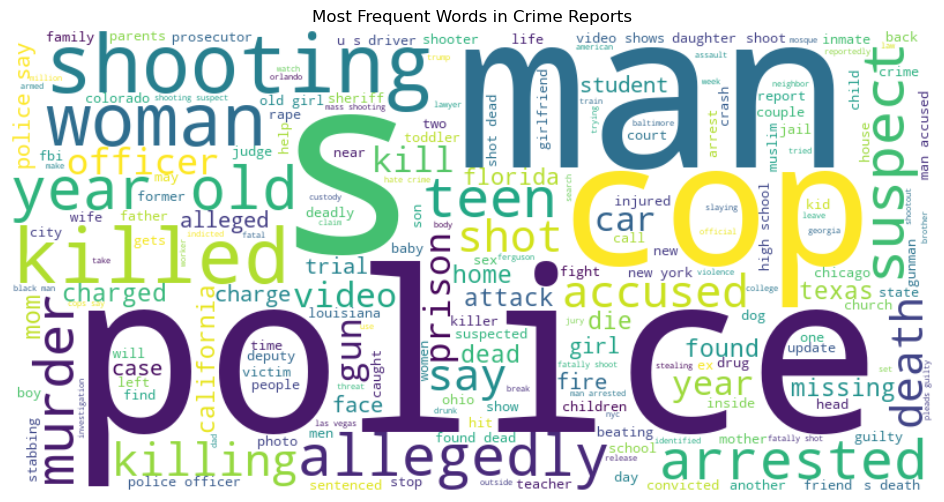

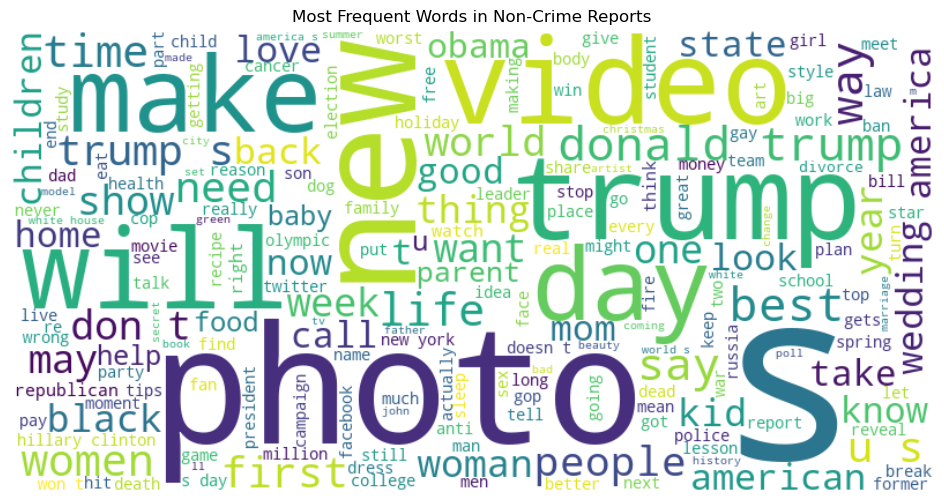

In [10]:
#Visualize the most frequent words in crime reports and non-crime reports
def generate_wordcloud_by_class(df, label_column='is_crime_report', label_value=1):
    subset = df[df[label_column] == label_value]
    text = ' '.join(clean_text(t) for t in subset['title'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    label = 'Crime Reports' if label_value == 1 else 'Non-Crime Reports'
    plt.title(f'Most Frequent Words in {label}')
    plt.show()

# Crime class
generate_wordcloud_by_class(df_cl, label_value=1)

# Non-crime class
generate_wordcloud_by_class(df_cl, label_value=0)


#### DATA PREPARATION

In [11]:
#seperate into X and y which is or features and Target variables
X = df_cl['title']
y = df_cl['is_crime_report']

#split into Test and Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


#### MODEL TRAINING

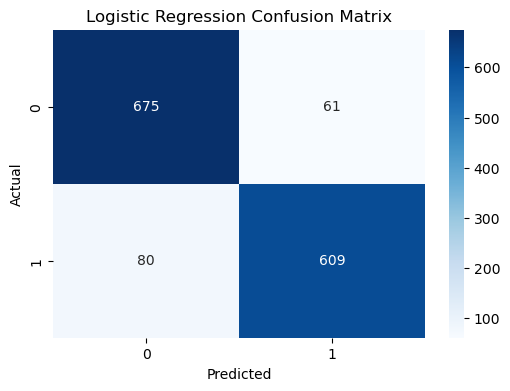

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       736
           1       0.91      0.88      0.90       689

    accuracy                           0.90      1425
   macro avg       0.90      0.90      0.90      1425
weighted avg       0.90      0.90      0.90      1425



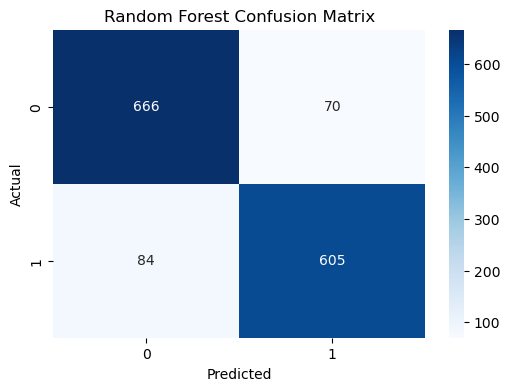

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       736
           1       0.90      0.88      0.89       689

    accuracy                           0.89      1425
   macro avg       0.89      0.89      0.89      1425
weighted avg       0.89      0.89      0.89      1425



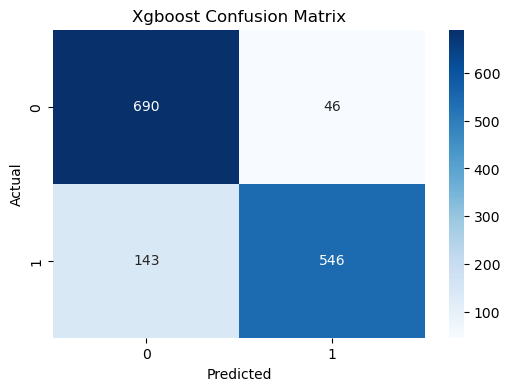

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       736
           1       0.92      0.79      0.85       689

    accuracy                           0.87      1425
   macro avg       0.88      0.86      0.87      1425
weighted avg       0.87      0.87      0.87      1425



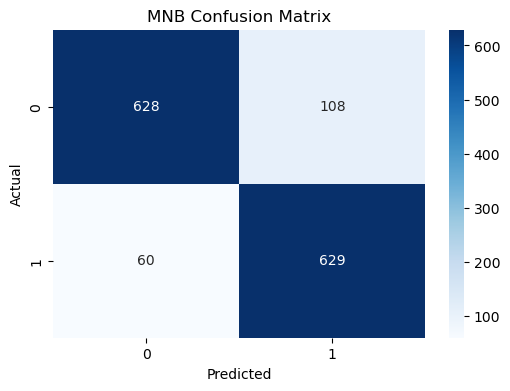

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       736
           1       0.85      0.91      0.88       689

    accuracy                           0.88      1425
   macro avg       0.88      0.88      0.88      1425
weighted avg       0.88      0.88      0.88      1425



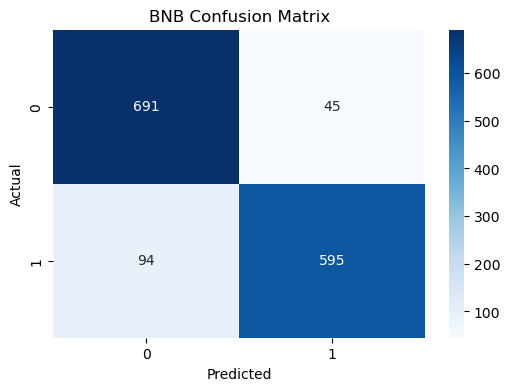

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       736
           1       0.93      0.86      0.90       689

    accuracy                           0.90      1425
   macro avg       0.90      0.90      0.90      1425
weighted avg       0.90      0.90      0.90      1425



In [20]:
#Feature extraction
vectorizer = TfidfVectorizer(
    stop_words='english',
    min_df=2,
    max_df=0.9,
    max_features=5000,
    ngram_range=(1, 2)
)

#train the models

#models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Xgboost': XGBClassifier(),
    'MNB': MultinomialNB(),
    'BNB': BernoulliNB()
}

#store the results
results = {
    'Models': [],
    'Train_Accuracy': [],
    'Test_Accuracy': []
}

for name, model in models.items():
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('Classifier', model)
    ])

    #train
    pipeline.fit(X_train, y_train)

    #predict
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)

    #results
    train_accuracy = accuracy_score(train_pred, y_train)
    test_accuracy = accuracy_score(test_pred, y_test)

    #Confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=pipeline.classes_ , yticklabels=pipeline.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    #Classification Report
    cr = classification_report(y_test, test_pred)
    print(cr)

    #append results
    results['Models'].append(name)
    results['Train_Accuracy'].append(train_accuracy)
    results['Test_Accuracy'].append(test_accuracy)


In [17]:
df_results = pd.DataFrame(results)
df_results

,Models,Train_Accuracy,Test_Accuracy
0,Logistic Regression,0.945078,0.901053
1,Random Forest,0.998947,0.891930
2,Xgboost,0.903492,0.867368
3,MNB,0.938586,0.882105
4,BNB,0.935778,0.902456
